In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [24]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


<AxesSubplot:>

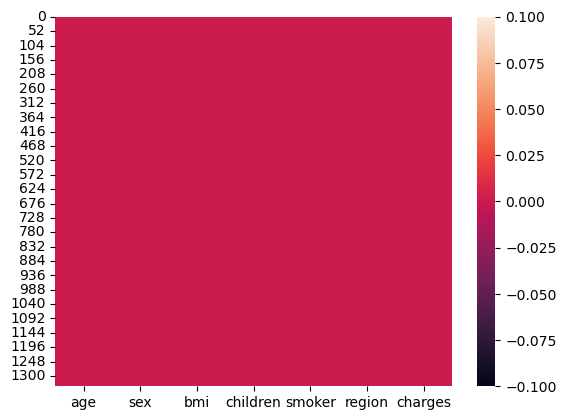

In [25]:
sns.heatmap(df.isnull())

no     1064
yes     274
Name: smoker, dtype: int64


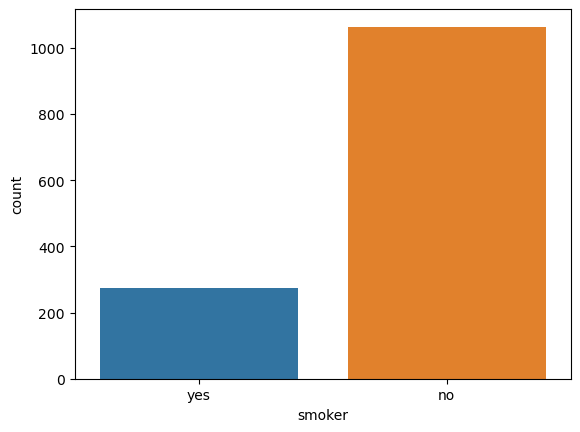

In [26]:
#we can observe that number of non-smokers are more as compared to smokers in the provided insurance data set
ax=sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())

male      676
female    662
Name: sex, dtype: int64


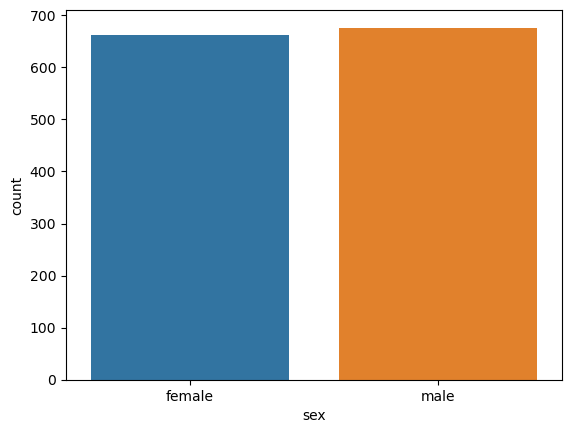

In [14]:
#we can observe in the below grapg that number of male and female are almost same in the insurance set
ax=sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


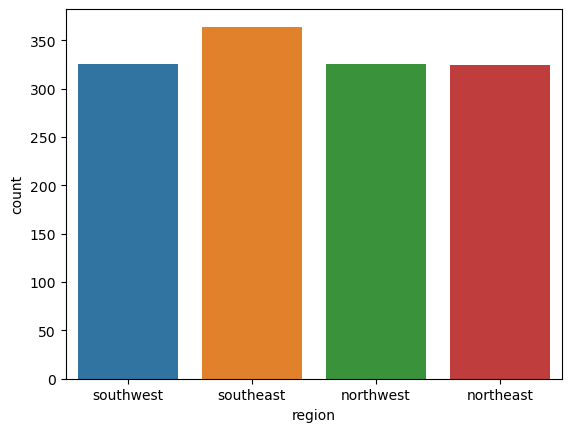

In [15]:
#In below graph we can observe that the regions (southeast, southwest, northeast and northwest) are almost same however southeast is data is high as compared to others.
ax=sns.countplot(x='region', data=df)
print(df['region'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


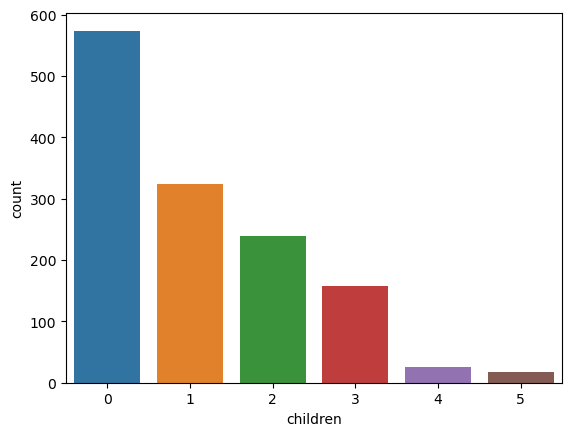

In [16]:
#In the below graph we can observe that the customer having children zero are more in health insurance data and customers having 5 children are very less as compares to other.
ax=sns.countplot(x='children', data=df)
print(df['children'].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


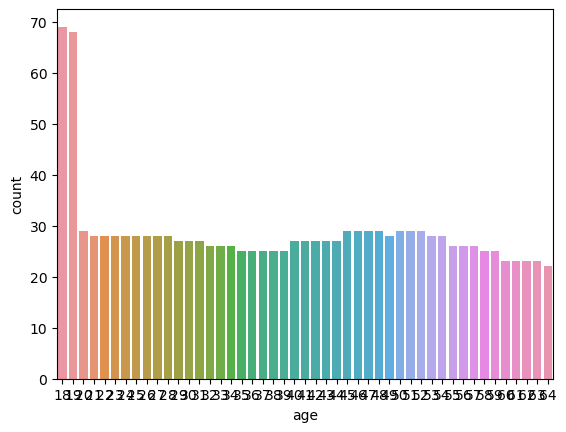

In [17]:
ax=sns.countplot(x='age', data=df)
print(df['age'].value_counts())

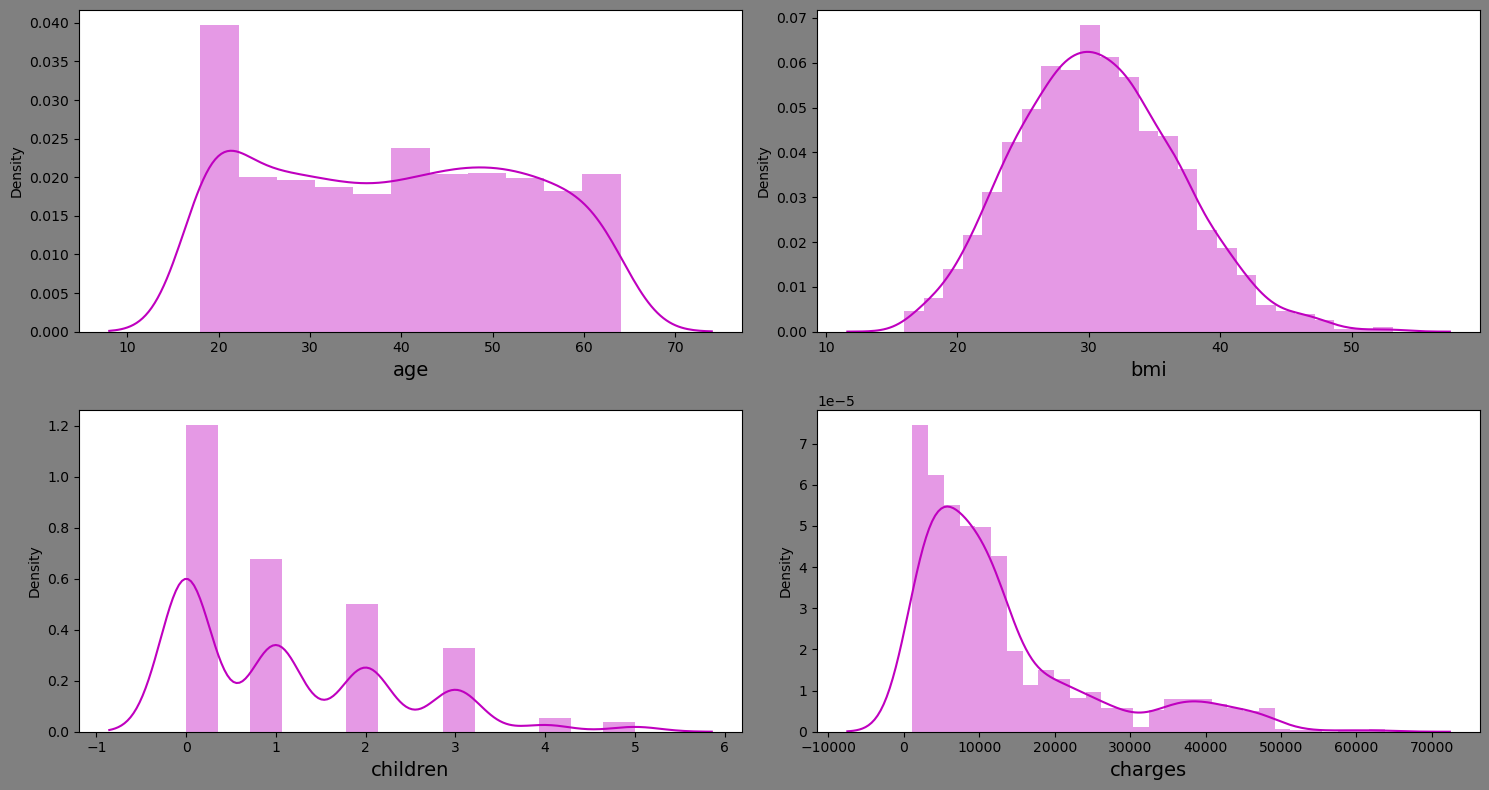

In [21]:
#In the below distribution plot we can identified that the data in all the column is similar except the children. Data in charges column is skewed and rest all the columns does not shows the skewed data.
plt.figure(figsize=(15,8), facecolor= "grey")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

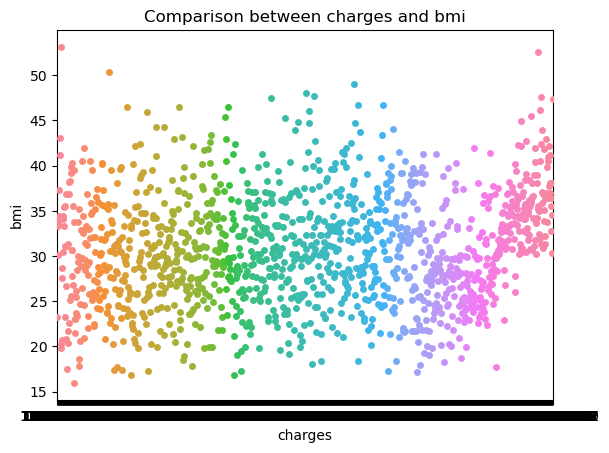

In [23]:
plt.title("Comparison between charges and bmi")
sns.stripplot(x= "charges", y="bmi", data=df)
plt.show()

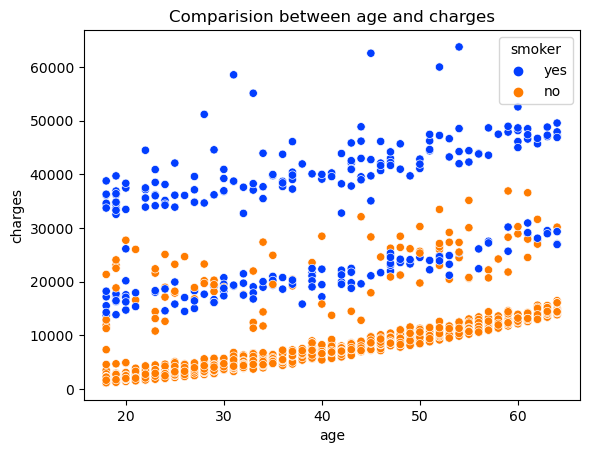

In [24]:

plt.title("Comparision between age and charges")
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette= 'bright')
plt.show()

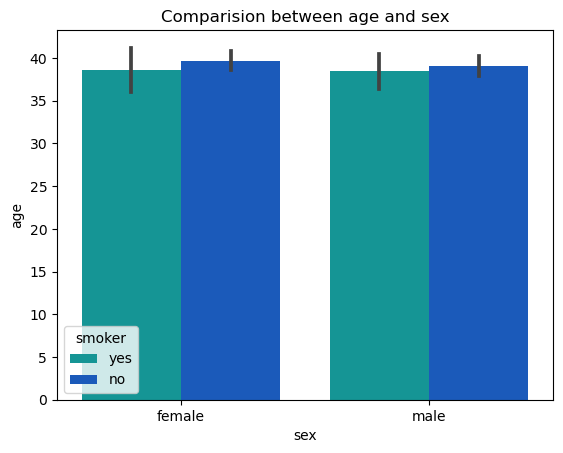

In [26]:

plt.title("Comparision between age and sex")
sns.barplot(x='sex', y='age', data=df, hue='smoker', palette= 'winter_r')
plt.show()

#As per the above barplot we can see that the smoker and non smokers as per age and sex are almost similar there is not much difference for both male and female

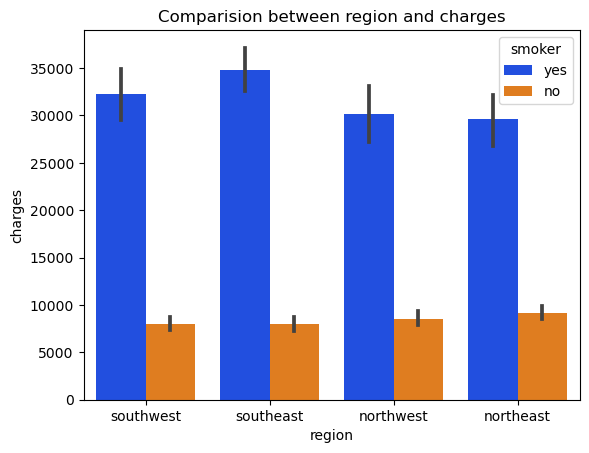

In [27]:

plt.title("Comparision between region and charges")
sns.barplot(x='region', y='charges', data=df, hue='smoker', palette= 'bright')
plt.show()

#As per the above barplot, we can see the comparision between reginal wise charges for smokers and non smokers

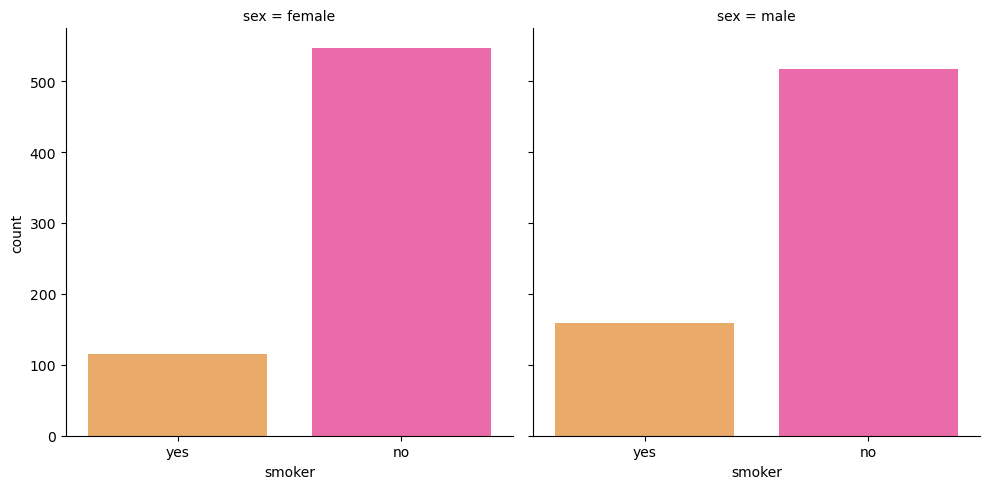

In [30]:
sns.catplot(x='smoker', col='sex', data=df, kind="count", palette="spring_r")

#As per the above chart we can verify the smokers and non smokers male and females

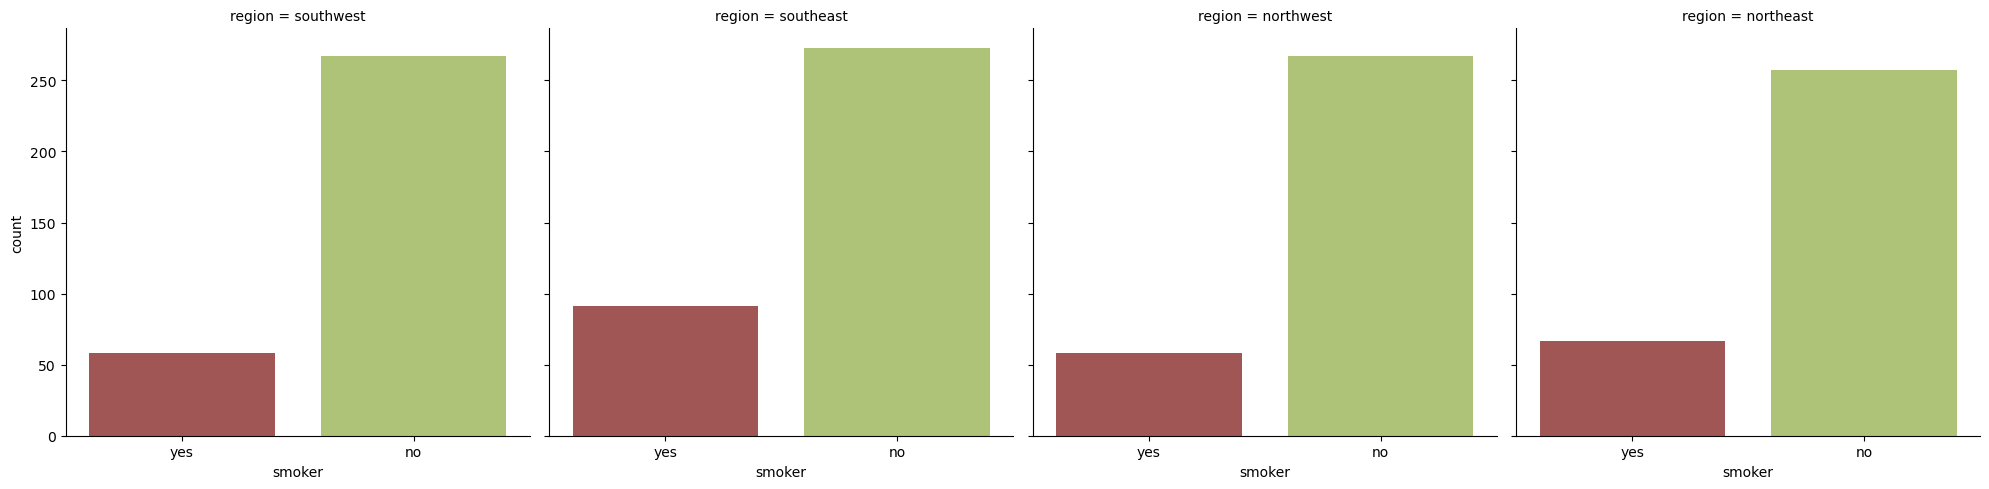

In [32]:
sns.catplot(x='smoker', col='region', data=df, kind="count", palette="tab20b_r")

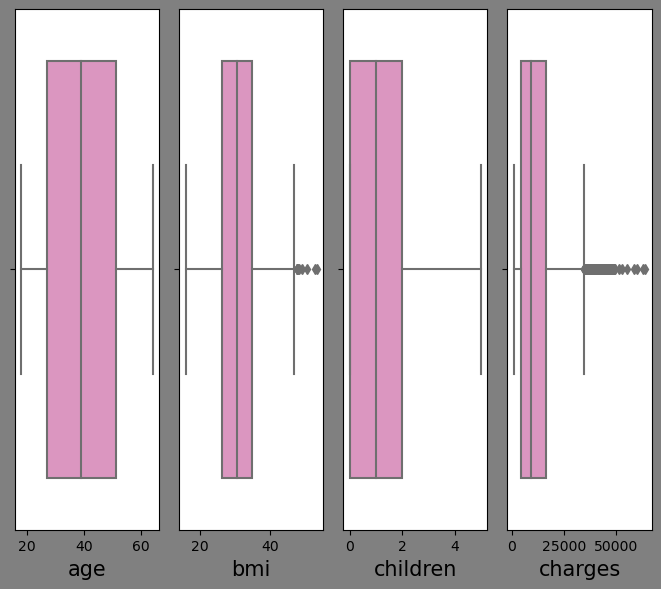

In [14]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(1,6, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

As per above boxplot we can verify that BMI shows the outliers and rest other age and children does not reflect the outliers

In [15]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Data is not highly skewed so we can proceed further as data is clean

In [32]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df [i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        df

In [33]:
cor= df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


There is mostly positive corelationship between all

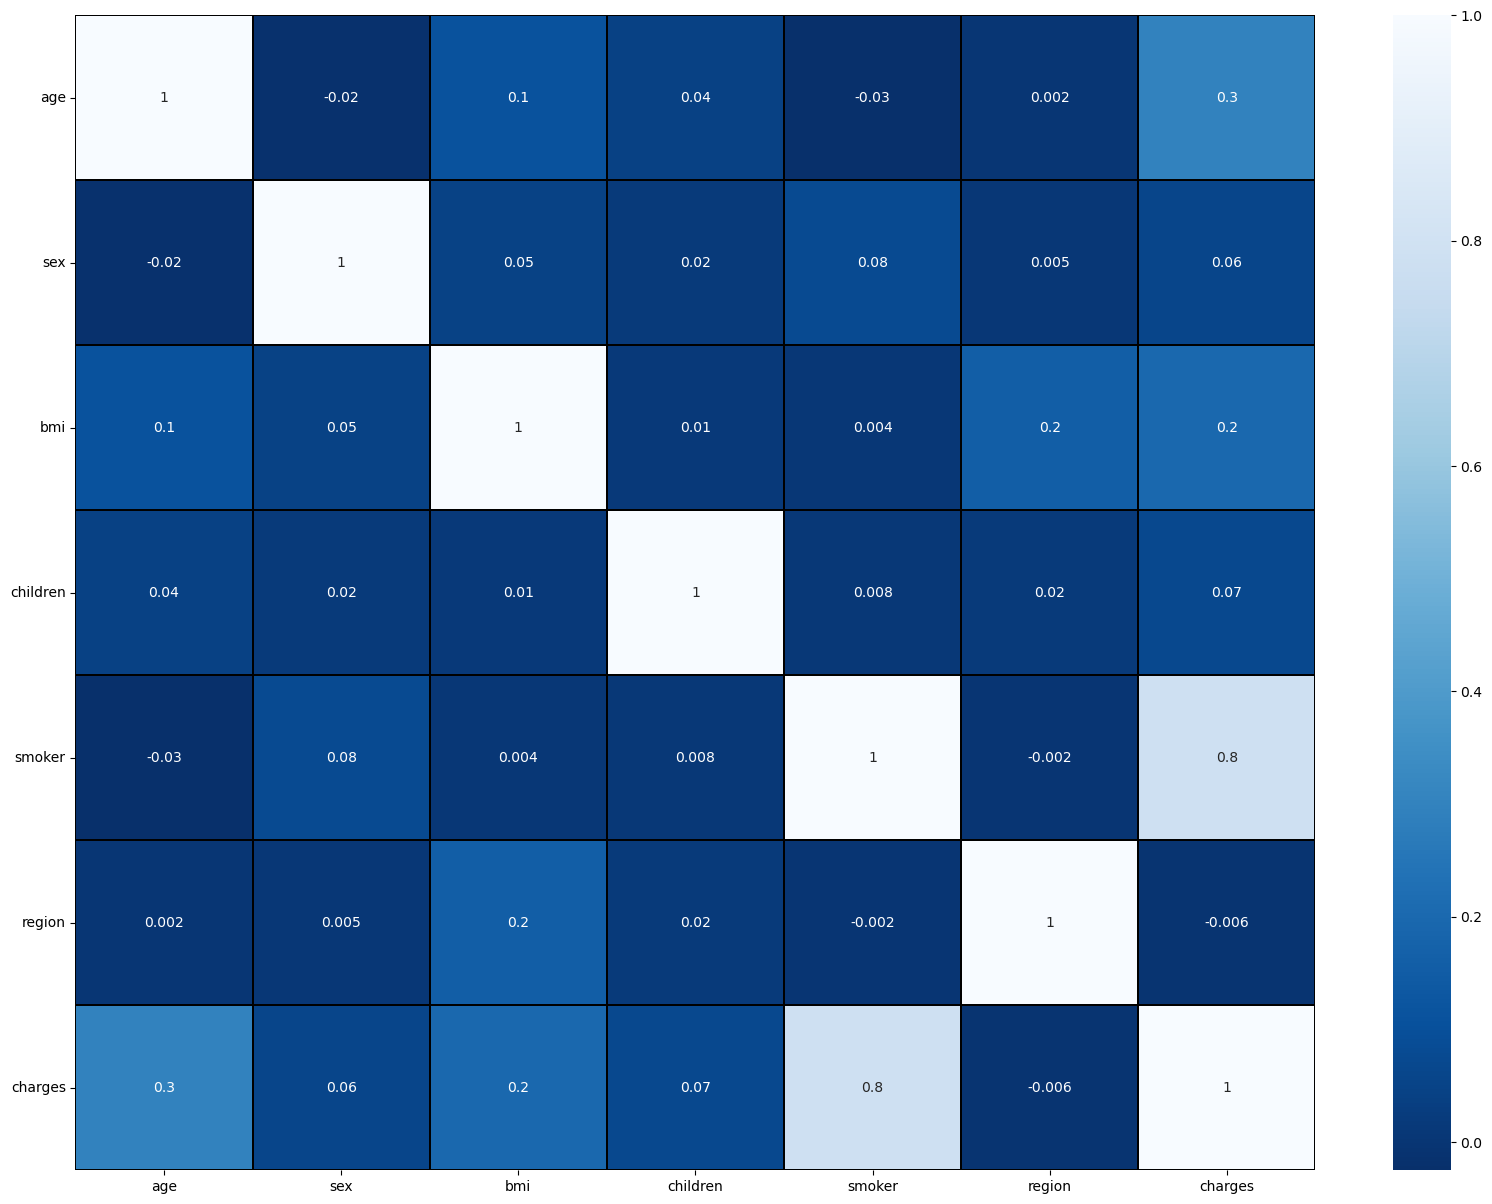

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()


We can observe the relation between feature to feature and feature to label. There is positive corelation between target and features. Also column age has very corelation with label.

In [53]:
x=df.drop("age", axis=1)
y=df["age"]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,sex,bmi,children,smoker,region,charges
0,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...
1333,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


Scaled the data using standard scalarization method to overcome the issue of biasness.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.008749,sex
1,1.147703,bmi
2,1.011462,children
3,2.843373,smoker
4,1.029786,region
5,2.967213,charges


By using VIF we can find the feature causing multicollineraity problem

In [38]:
x.drop("region",axis=1,inplace=True)

In [56]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.008749,sex
1,1.147703,bmi
2,1.011462,children
3,2.843373,smoker
4,1.029786,region
5,2.967213,charges


In [57]:
y.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [58]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1= SM.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [59]:
y.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [60]:
y1.value_counts()

19    69
61    69
36    69
21    69
48    69
40    69
58    69
53    69
43    69
64    69
20    69
44    69
41    69
57    69
29    69
45    69
54    69
49    69
47    69
51    69
42    69
50    69
38    69
24    69
18    69
23    69
28    69
33    69
32    69
31    69
46    69
37    69
60    69
25    69
62    69
56    69
35    69
27    69
52    69
30    69
34    69
59    69
63    69
55    69
22    69
26    69
39    69
Name: age, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1, y1,test_size = 0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is", maxAccu, "at random_state",maxRS)

Best accuracy is 0.5364850976361768 at random_state 1
Best accuracy is 0.5508735868448099 at random_state 2
Best accuracy is 0.5817060637204522 at random_state 3
Best accuracy is 0.5837615621788284 at random_state 38


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [66]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [68]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))


0.19402985074626866
[[16  0  0 ...  0  0  0]
 [ 1 15  2 ...  0  1  0]
 [ 3  0  1 ...  0  0  0]
 ...
 [ 0  0  2 ...  1  1  0]
 [ 0  0  0 ...  2  2  1]
 [ 0  0  0 ...  1  2  1]]
              precision    recall  f1-score   support

          18       0.64      0.70      0.67        23
          19       0.71      0.50      0.59        30
          20       0.11      0.14      0.12         7
          21       0.20      0.25      0.22         8
          22       0.25      0.09      0.13        11
          23       0.17      0.14      0.15         7
          24       0.20      0.20      0.20         5
          25       0.00      0.00      0.00         6
          26       0.30      0.33      0.32         9
          27       0.12      0.09      0.11        11
          28       0.00      0.00      0.00         9
          29       0.08      0.12      0.10         8
          30       0.00      0.00      0.00         5
          31       0.20      0.09      0.13        11
          32 

In [70]:
GB=GradientBoostingClassifier() 
GB.fit(x_train, y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.29850746268656714
[[16  0  0 ...  0  0  0]
 [ 3 15  2 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  1  2  1]
 [ 0  0  0 ...  0  3  3]
 [ 0  0  0 ...  0  2  2]]
              precision    recall  f1-score   support

          18       0.73      0.70      0.71        23
          19       0.56      0.50      0.53        30
          20       0.10      0.14      0.12         7
          21       0.50      0.25      0.33         8
          22       0.56      0.45      0.50        11
          23       0.08      0.14      0.11         7
          24       0.50      0.60      0.55         5
          25       0.15      0.33      0.21         6
          26       0.28      0.56      0.37         9
          27       0.00      0.00      0.00        11
          28       0.18      0.22      0.20         9
          29       0.29      0.50      0.36         8
          30       0.22      0.40      0.29         5
          31       0.30      0.27      0.29        11
          32 

In [71]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train) 
predET=ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.16417910447761194
[[17  0  0 ...  0  0  0]
 [ 0 16  2 ...  0  0  0]
 [ 2  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  1  1  1]
 [ 0  0  0 ...  2  3  0]
 [ 0  0  0 ...  0  2  0]]
              precision    recall  f1-score   support

          18       0.61      0.74      0.67        23
          19       0.64      0.53      0.58        30
          20       0.07      0.14      0.10         7
          21       0.14      0.12      0.13         8
          22       0.00      0.00      0.00        11
          23       0.00      0.00      0.00         7
          24       0.25      0.20      0.22         5
          25       0.00      0.00      0.00         6
          26       0.33      0.22      0.27         9
          27       0.11      0.09      0.10        11
          28       0.00      0.00      0.00         9
          29       0.09      0.12      0.11         8
          30       0.00      0.00      0.00         5
          31       0.00      0.00      0.00        11
          32 

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
score = cross_val_score(RFC,x,y) 
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test, predRFC)-score.mean())

[0.22014925 0.24253731 0.27238806 0.25093633 0.20973783]
0.23914975683380849
Difference between Accuracy score and cross validation score is- -0.045119906087539824


In [74]:
score = cross_val_score(GB, x1, y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test, predGB)-score.mean())

[0.37596302 0.40677966 0.42989214 0.44444444 0.41049383]
0.41351461888185054
Difference between Accuracy score and cross validation score is- -0.1150071561952834


In [75]:
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is-", accuracy_score(y_test, predET)-score.mean())

[0.1641791  0.17537313 0.20149254 0.19475655 0.20224719]
0.18760970428755103
Difference between Accuracy score and cross validation score is- -0.023430599809939084


Extra Tress classifier is our best model as difference between scores are least

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [78]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [84]:
import joblib
joblib.dump(ET,"Insurance_costs.pkl")

['Insurance_costs.pkl']

In [85]:
model = joblib.load("Insurance_costs.pkl")
prediction = model.predict(x_test)
prediction

array([19, 42, 61, 63, 34, 19, 33, 34, 43, 35, 46, 53, 31, 62, 39, 45, 43,
       60, 64, 48, 19, 18, 33, 36, 39, 18, 20, 20, 27, 33, 27, 35, 36, 57,
       33, 61, 19, 20, 54, 22, 25, 19, 45, 30, 59, 26, 40, 39, 19, 58, 47,
       29, 35, 29, 49, 24, 63, 39, 31, 45, 32, 51, 18, 37, 46, 21, 39, 32,
       32, 56, 54, 18, 55, 45, 40, 33, 20, 48, 58, 32, 18, 18, 18, 56, 32,
       49, 34, 45, 23, 35, 54, 29, 18, 53, 56, 50, 54, 40, 47, 50, 62, 18,
       29, 37, 59, 19, 62, 39, 55, 37, 55, 51, 58, 50, 54, 54, 48, 40, 47,
       55, 43, 33, 33, 32, 35, 20, 43, 27, 40, 41, 51, 27, 22, 23, 21, 32,
       31, 27, 21, 33, 41, 28, 25, 51, 57, 48, 20, 49, 46, 64, 32, 48, 51,
       18, 37, 40, 58, 18, 19, 38, 46, 51, 36, 52, 58, 21, 45, 56, 64, 43,
       24, 51, 18, 24, 46, 47, 25, 41, 33, 56, 60, 38, 39, 30, 18, 43, 40,
       47, 63, 63, 60, 45, 19, 36, 58, 23, 50, 63, 36, 30, 52, 26, 46, 51,
       19, 29, 28, 36, 64, 28, 39, 47, 52, 61, 58, 20, 52, 54, 47, 62, 20,
       50, 19, 27, 49, 19

In [86]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,19,27
1,42,41
2,61,41
3,63,63
4,34,30
...,...,...
397,29,37
398,59,50
399,20,59
400,18,18
